In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl

In [2]:
# Plotting settings
# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.linewidth'] = 2

colours = {"empirical":"#e7298a", "millimillennium":"#1b9e77", "EAGLE":"#7570b3", "TNG":"#d95f02"}

In [3]:
path = "../data/"

In [13]:
data = h5py.File(f"{path}/data.h5", "r")
event_rates = data['event_rates']
observations = data['observations']

In [14]:
h = event_rates.attrs['h']
omega_M = event_rates.attrs['omega_M']
omega_L = event_rates.attrs['omega_L']

In [15]:
# The event rates from different SFH have the same redshift bins
redshift = event_rates.attrs['event_redshift'][:-1]

In [16]:
SFH_names = ["empirical", "millimillennium", "EAGLE", "TNG"]

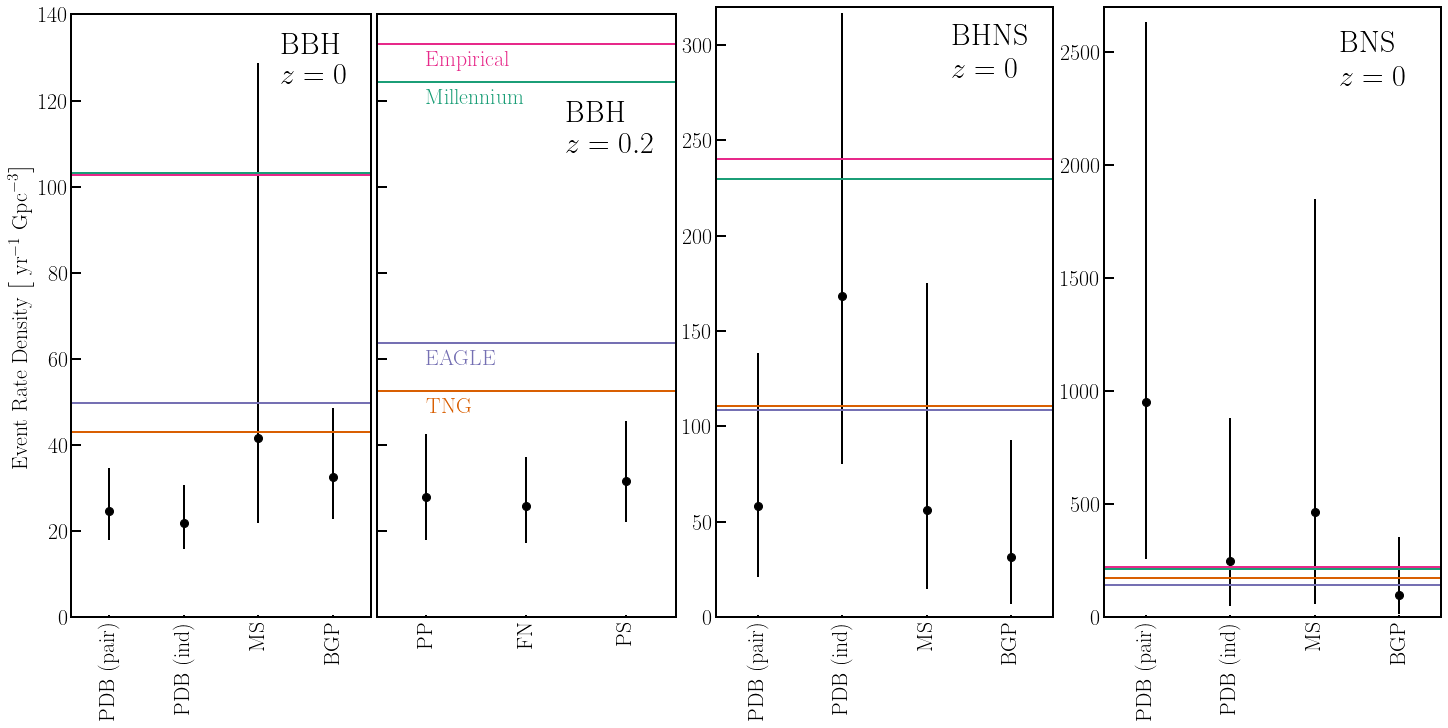

In [38]:
fig = plt.figure(figsize=(20,10),constrained_layout=True)
gs1 = fig.add_gridspec(1, 4)

BBH_gs = gs1[0:2].subgridspec(1,2, wspace=0)
#fig, axes = plt.subplots(1,2, figsize=(10,10))
#plt.subplots_adjust(wspace=0)

ax1 = fig.add_subplot(BBH_gs[0])
ax1.set_ylim(0,140)
ax1.set_xlim(0.5, 4.5)

obs = observations['BBH']


# BBH
ax1.text(3.3, 131,r"BBH", fontsize=30)
ax1.text(3.3, 124,r"$z=0$", fontsize=30)

for i in range(4):
    ax1.errorbar(i+1,
            obs['rate'][i]*h**3, 
            xerr=[[0],[0]],
            yerr=[[obs['lower_rate'][i]*h**3], [obs['upper_rate'][i]*h**3]],
            fmt="o",
            ms=8,
            color="black", 
            lw=2)

for i in SFH_names:
    ax1.axhline(np.sum(event_rates[i]["BBH"], axis=0)[0], -1, 6, color=colours[i], lw=2)

    
ax1.xaxis.set_major_locator(ticker.FixedLocator([1,2,3,4]))
ax1.set_xticklabels(["PDB (pair)", "PDB (ind)", "MS", "BGP"], rotation='vertical')

# Set the minor and major ticks on both axes
ax1.xaxis.set_tick_params(which='major', size=2, width=2, direction='in')
ax1.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax1.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

ax1.set_ylabel(r"Event Rate Density $\left[\textrm{ yr}^{-1} \textrm{ Gpc}^{-3}\right]$")
ax2 = fig.add_subplot(BBH_gs[1])


# BBH z=0.2
ax2.text(2.4, 115,r"BBH", fontsize=30)
ax2.text(2.4, 108,r"$z=0.2$", fontsize=30)


for i in range(3):
    ax2.errorbar(i+1,
                 obs['rate'][i+4]*h**3,
                 xerr=[[0],[0]],
                yerr=[[obs['lower_rate'][i+4]*h**3], [obs['upper_rate'][i+4]*h**3]],
            fmt="o",
            ms=8,
            #alpha=0.5,
            color="black", 
            lw=2)

rate = np.interp(0.2, redshift, np.sum(event_rates['millimillennium']['BBH'], axis=0))
ax2.axhline(rate,-1,6, color=colours['millimillennium'], lw=2)
ax2.text(1, rate-5, "Millennium", color=colours["millimillennium"])

rate = np.interp(0.2, redshift, np.sum(event_rates['EAGLE']['BBH'], axis=0))
ax2.axhline(rate, -1,6, color=colours['EAGLE'], lw=2)
ax2.text(1, rate-5, "EAGLE", color=colours["EAGLE"])

rate = np.interp(0.2, redshift, np.sum(event_rates['TNG']['BBH'], axis=0))
ax2.axhline(rate, -1,6, color=colours['TNG'], lw=2)
ax2.text(1, rate-5, "TNG", color=colours["TNG"])

rate = np.interp(0.2, redshift, np.sum(event_rates['empirical']['BBH'], axis=0))
ax2.axhline(rate, -1,6, color=colours['empirical'], lw=2)
ax2.text(1, rate-5, "Empirical", color=colours["empirical"])


ax2.xaxis.set_major_locator(ticker.FixedLocator([1,2,3]))
ax2.set_xticklabels(["PP",  "FN", "PS"], rotation='vertical')
ax2.set_ylim(0,140)
ax2.set_xlim(0.5,3.5)

# Set the minor and major ticks on both axes
ax2.xaxis.set_tick_params(which='major', size=2, width=2, direction='in')
ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax2.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax2.set_yticklabels([])



# BHNS

ax3 = fig.add_subplot(gs1[2])
ax3.text(3.3, 300,r"BHNS", fontsize=30)

ax3.text(3.3, 283,r"$z=0$", fontsize=30)


obs = observations['BHNS']

for i in range(4):
    ax3.errorbar(i+1,
            obs['rate'][i]*h**3, 
            xerr=[[0],[0]],
            yerr=[[obs['lower_rate'][i]*h**3], [obs['upper_rate'][i]*h**3]],
            fmt="o",
            ms=8,
            color="black", 
            lw=2)


for i in SFH_names:
    ax3.axhline(np.sum(event_rates[i]["BHNS"], axis=0)[0], -1, 6, color=colours[i], lw=2)


# Set the minor and major ticks on both axes
ax3.xaxis.set_tick_params(which='major', size=2, width=2, direction='in')
ax3.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax3.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax3.xaxis.set_major_locator(ticker.FixedLocator([1,2,3,4]))
ax3.set_xticklabels(["PDB (pair)", "PDB (ind)", "MS", "BGP"], rotation='vertical')

ax3.set_ylim(0,320)
ax3.set_xlim(0.5,4.5)


#BNS
ax4 = fig.add_subplot(gs1[3])

ax4.text(3.3, 2500,r"BNS", fontsize=30)

ax4.text(3.3, 2350,r"$z=0$", fontsize=30)


obs = observations['BNS']

for i in range(4):
    ax4.errorbar(i+1,
            obs['rate'][i]*h**3, 
            xerr=[[0],[0]],
            yerr=[[obs['lower_rate'][i]*h**3], [obs['upper_rate'][i]*h**3]],
            fmt="o",
            ms=8,
            color="black", 
            lw=2)

for i in SFH_names:
    ax4.axhline(np.sum(event_rates[i]["BNS"], axis=0)[0], -1, 6, color=colours[i], lw=2)


ax4.set_ylim(0,2700)
ax4.set_xlim(0.5, 4.5)

# Set the minor and major ticks on both axes
ax4.xaxis.set_tick_params(which='major', size=2, width=2, direction='in')
ax4.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax4.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax4.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

ax4.xaxis.set_major_locator(ticker.FixedLocator([1,2,3,4]))
ax4.set_xticklabels(["PDB (pair)", "PDB (ind)", "MS", "BGP"], rotation='vertical')


plt.savefig("./images/pdf/GW_rates.pdf")
plt.show()


In [39]:
data.close()